In [1]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

--2022-04-05 18:57:29--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb [following]
--2022-04-05 18:57:29--  https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?YBnOWNWzihyEURfpWYEXT2HW4n0BhF_-FBc1WvRPIeVLJHQ5ds2QlBAYA8tMdfolko_15VjRoZAbqvh3lKJBBfWk7vftu

In [2]:
!ls

cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb  drive  sample_data


In [3]:
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0

Selecting previously unselected package cuda-repo-ubuntu1704-9-0-local.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...
Setting up cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...
7fa2af80.pub
OK
Get:1 file:/var/cuda-repo-9-0-local  InRelease
Ign:1 file:/var/cuda-repo-9-0-local  InRelease
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpa

In [4]:
!pip install thundersvm

     |████████████████████████████████| 507 kB 5.2 MB/s 


In [5]:
from thundersvm import SVC

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('drive/MyDrive/DATA_310/safe_driver_prediction.csv')

In [2]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [3]:
data = data.replace(-1, np.nan)
data = data.dropna() #dropping the observations with missing values

In [4]:
y = data.dropna()['target'].values
x = data.loc[:,'ps_ind_01':'ps_calc_20_bin'].values

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import norm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split as tts

In [7]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [8]:
ind1 = (y==1)
ind0 = (y==0)

In [9]:
np.random.seed(123)
ind0 = np.random.choice(np.array(np.where(y==0)).ravel(),100000, replace=False)
x0 = x[ind0,:]
y0 = y[ind0]
x1 = x[(y==1),:]
y1 = y[(y==1)]

In [10]:
xm = np.concatenate([x0,x1],axis=0)
ym = np.concatenate([y0,y1],axis=0)

In [11]:
ym.shape

(105670,)

In [12]:
scale = StandardScaler()
x_scaled = scale.fit_transform(xm)

In [13]:
def ROC(classifier, x, y):
  n_samples, n_features = x.shape

  # Classification and ROC analysis

  # Run classifier with cross-validation and plot ROC curves
  cv = StratifiedKFold(n_splits=10,shuffle = True,random_state = 123)

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots(figsize=(10,8))
  for i, (train, test) in enumerate(cv.split(x, y)):
      x_train_scaled = scale.fit_transform(x[train])
      x_test_scaled = scale.transform(x[test])
      classifier.fit(x_train_scaled, y[train])
      viz = plot_roc_curve(classifier, x_test_scaled, y[test],
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example")
  ax.legend(loc="lower right")
  plt.show()

In [14]:
def ROC_SVC(classifier, x, y):
  n_samples, n_features = x.shape

  # Classification and ROC analysis

  # Run classifier with cross-validation and plot ROC curves
  cv = StratifiedKFold(n_splits=10,shuffle = True,random_state = 123)

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots(figsize=(10,8))
  for i, (train, test) in enumerate(cv.split(x, y)):
      x_train_scaled = scale.fit_transform(x[train])
      x_test_scaled = scale.transform(x[test])
      classifier.fit(x_train_scaled, y[train])
      y_pred_proba = classifier.predict_proba(x_test_scaled)[:,1]
      fpr, tpr, _ = roc_curve(y[test],  y_pred_proba)
      auc = roc_auc_score(y[test], y_pred_proba)
      interp_tpr = np.interp(mean_fpr, fpr, tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(auc)

  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example")
  ax.legend(loc="lower right")
  plt.show()

## Logistic Regression

In [107]:
#not really any hyperparameters to optimize, generate classification report for logistic regression
classifier = LogisticRegression(solver='lbfgs',max_iter=100000)
classifier.fit(xm,ym)
report_logreg = classification_report(ym, classifier.predict(xm))

In [108]:
print(report_logreg)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    100000
           1       0.40      0.01      0.01     21694

    accuracy                           0.82    121694
   macro avg       0.61      0.50      0.46    121694
weighted avg       0.75      0.82      0.74    121694



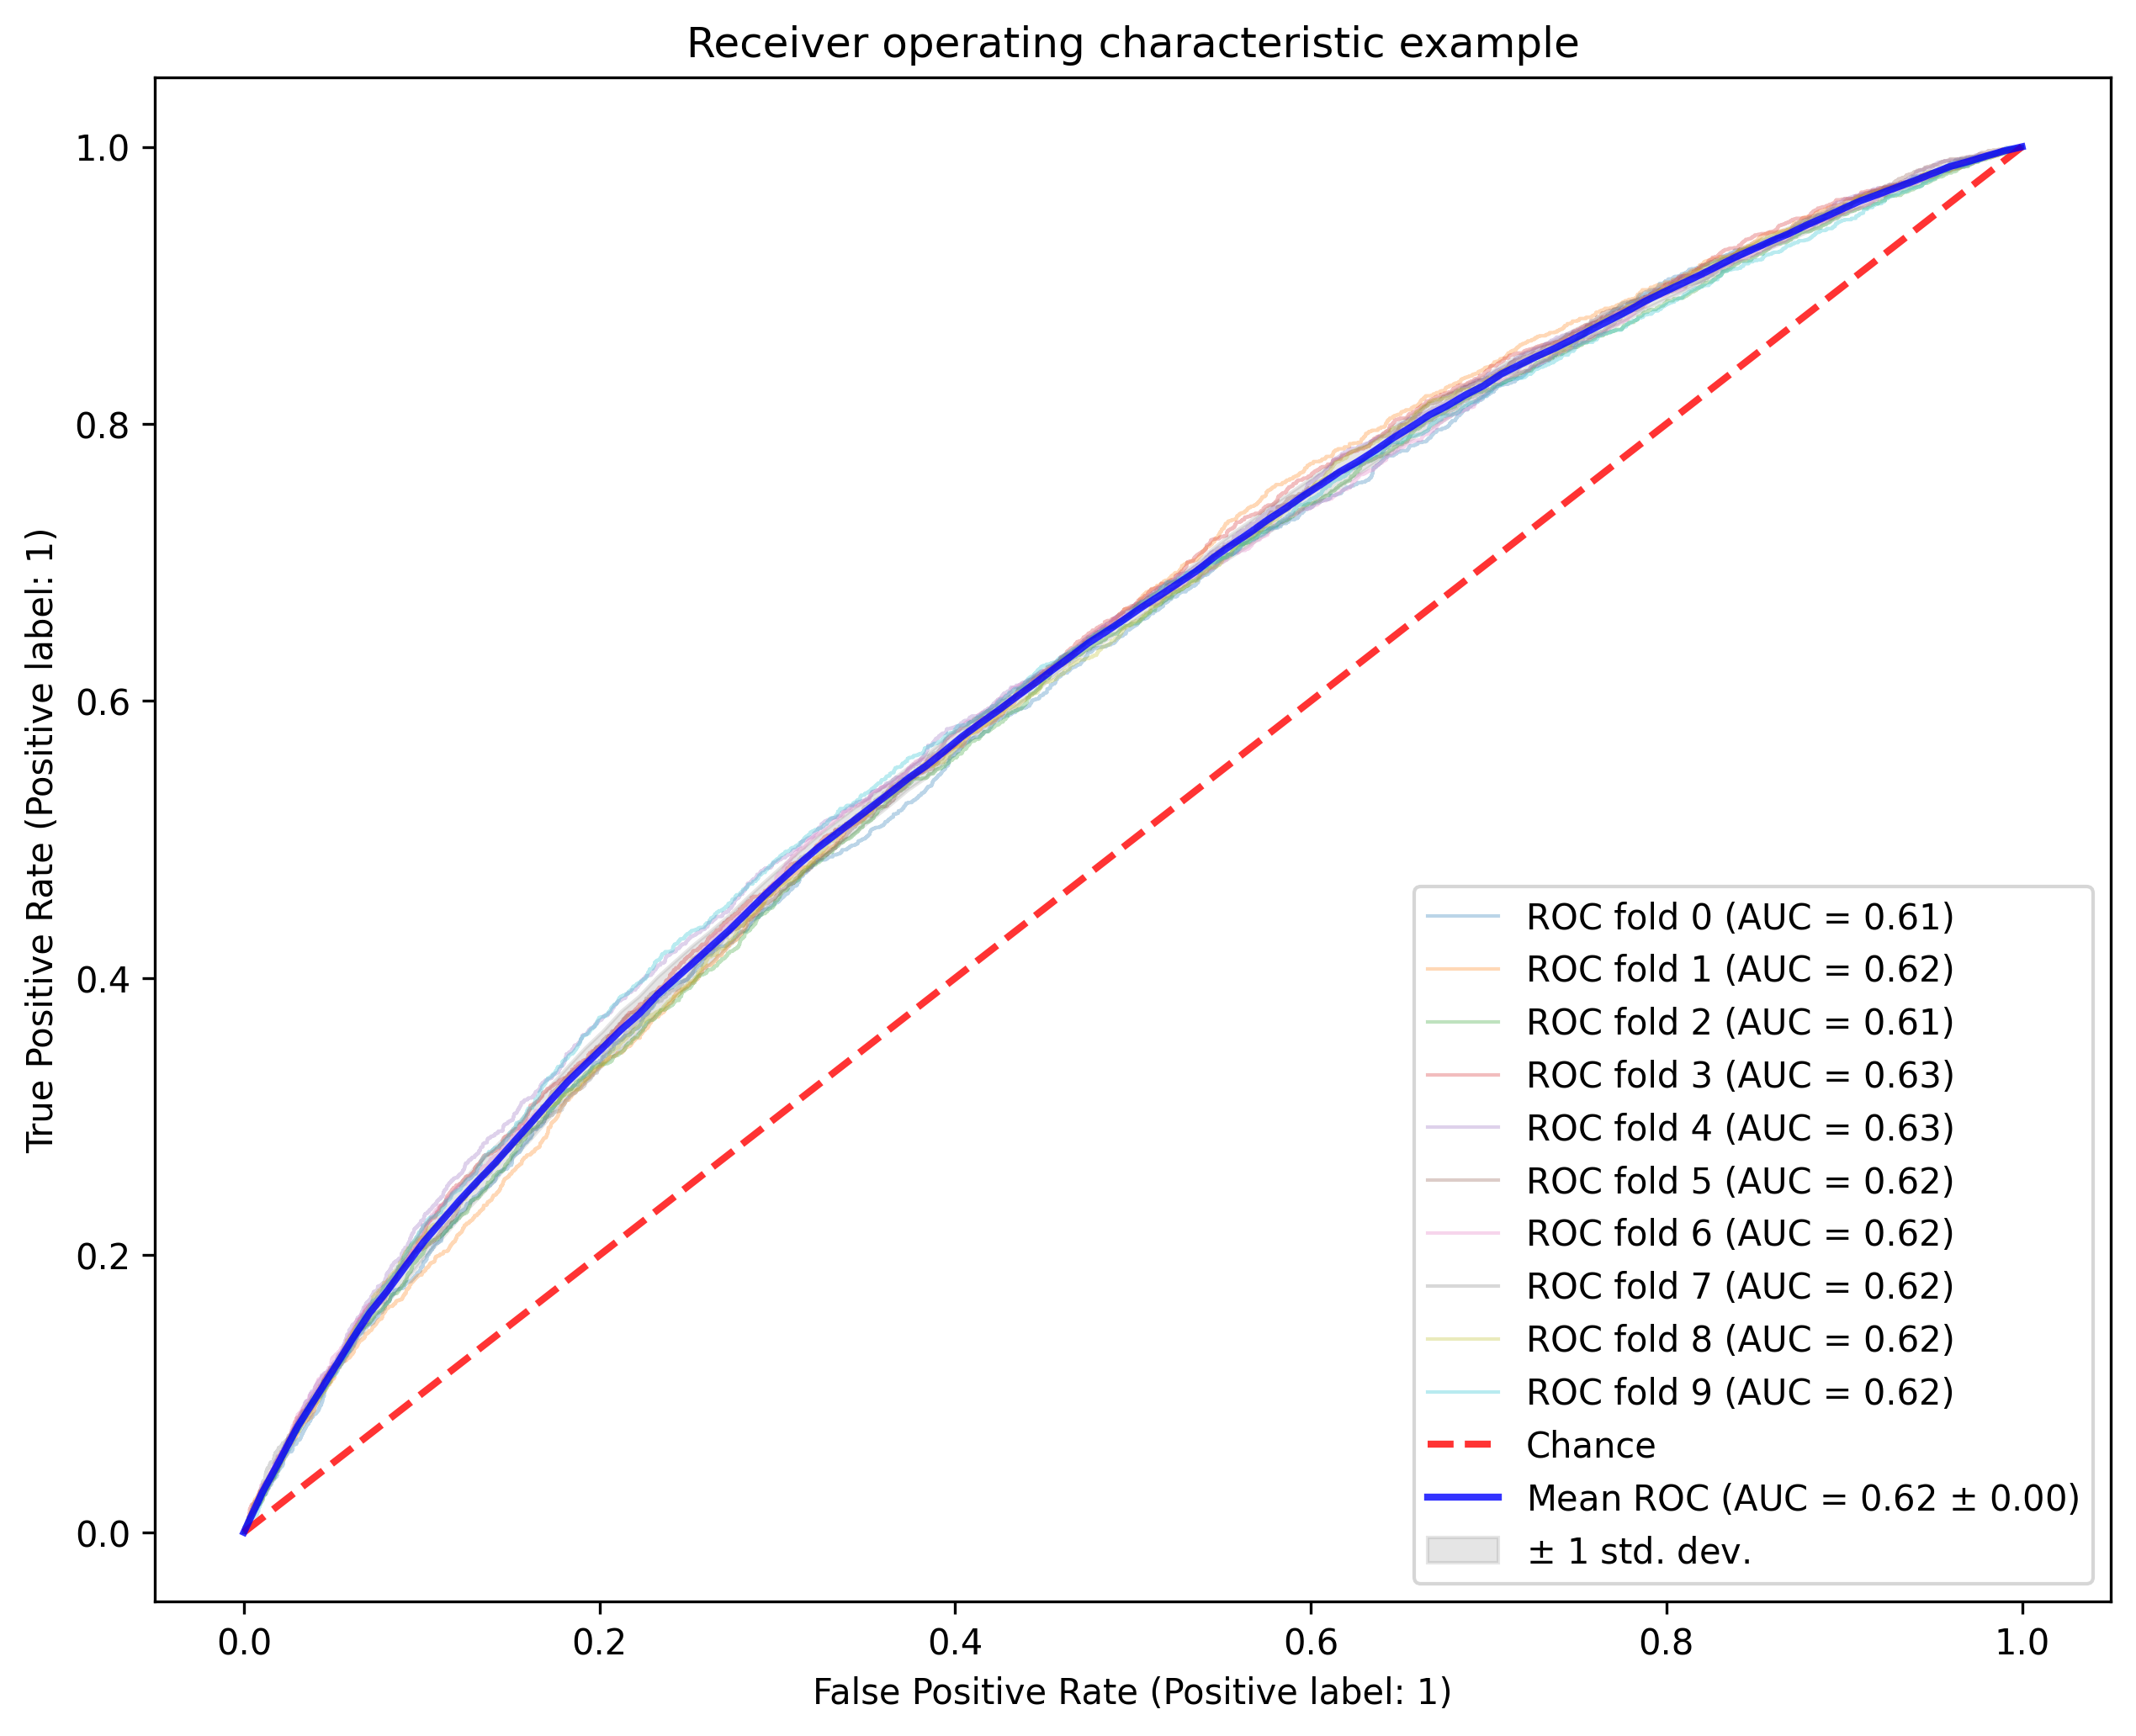

In [109]:
#Generate ROC plot for Logistic Regression
ROC(classifier,xm,ym)

## SVM

In [115]:
#Generate classification report for svm
classifier = SVC(kernel='rbf',C=1, gamma=0.1,probability=True)
classifier.fit(x_scaled,ym)
report_svm = classification_report(ym, classifier.predict(x_scaled))

In [116]:
print(report_svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       1.00      0.99      1.00     21694

    accuracy                           1.00    121694
   macro avg       1.00      1.00      1.00    121694
weighted avg       1.00      1.00      1.00    121694



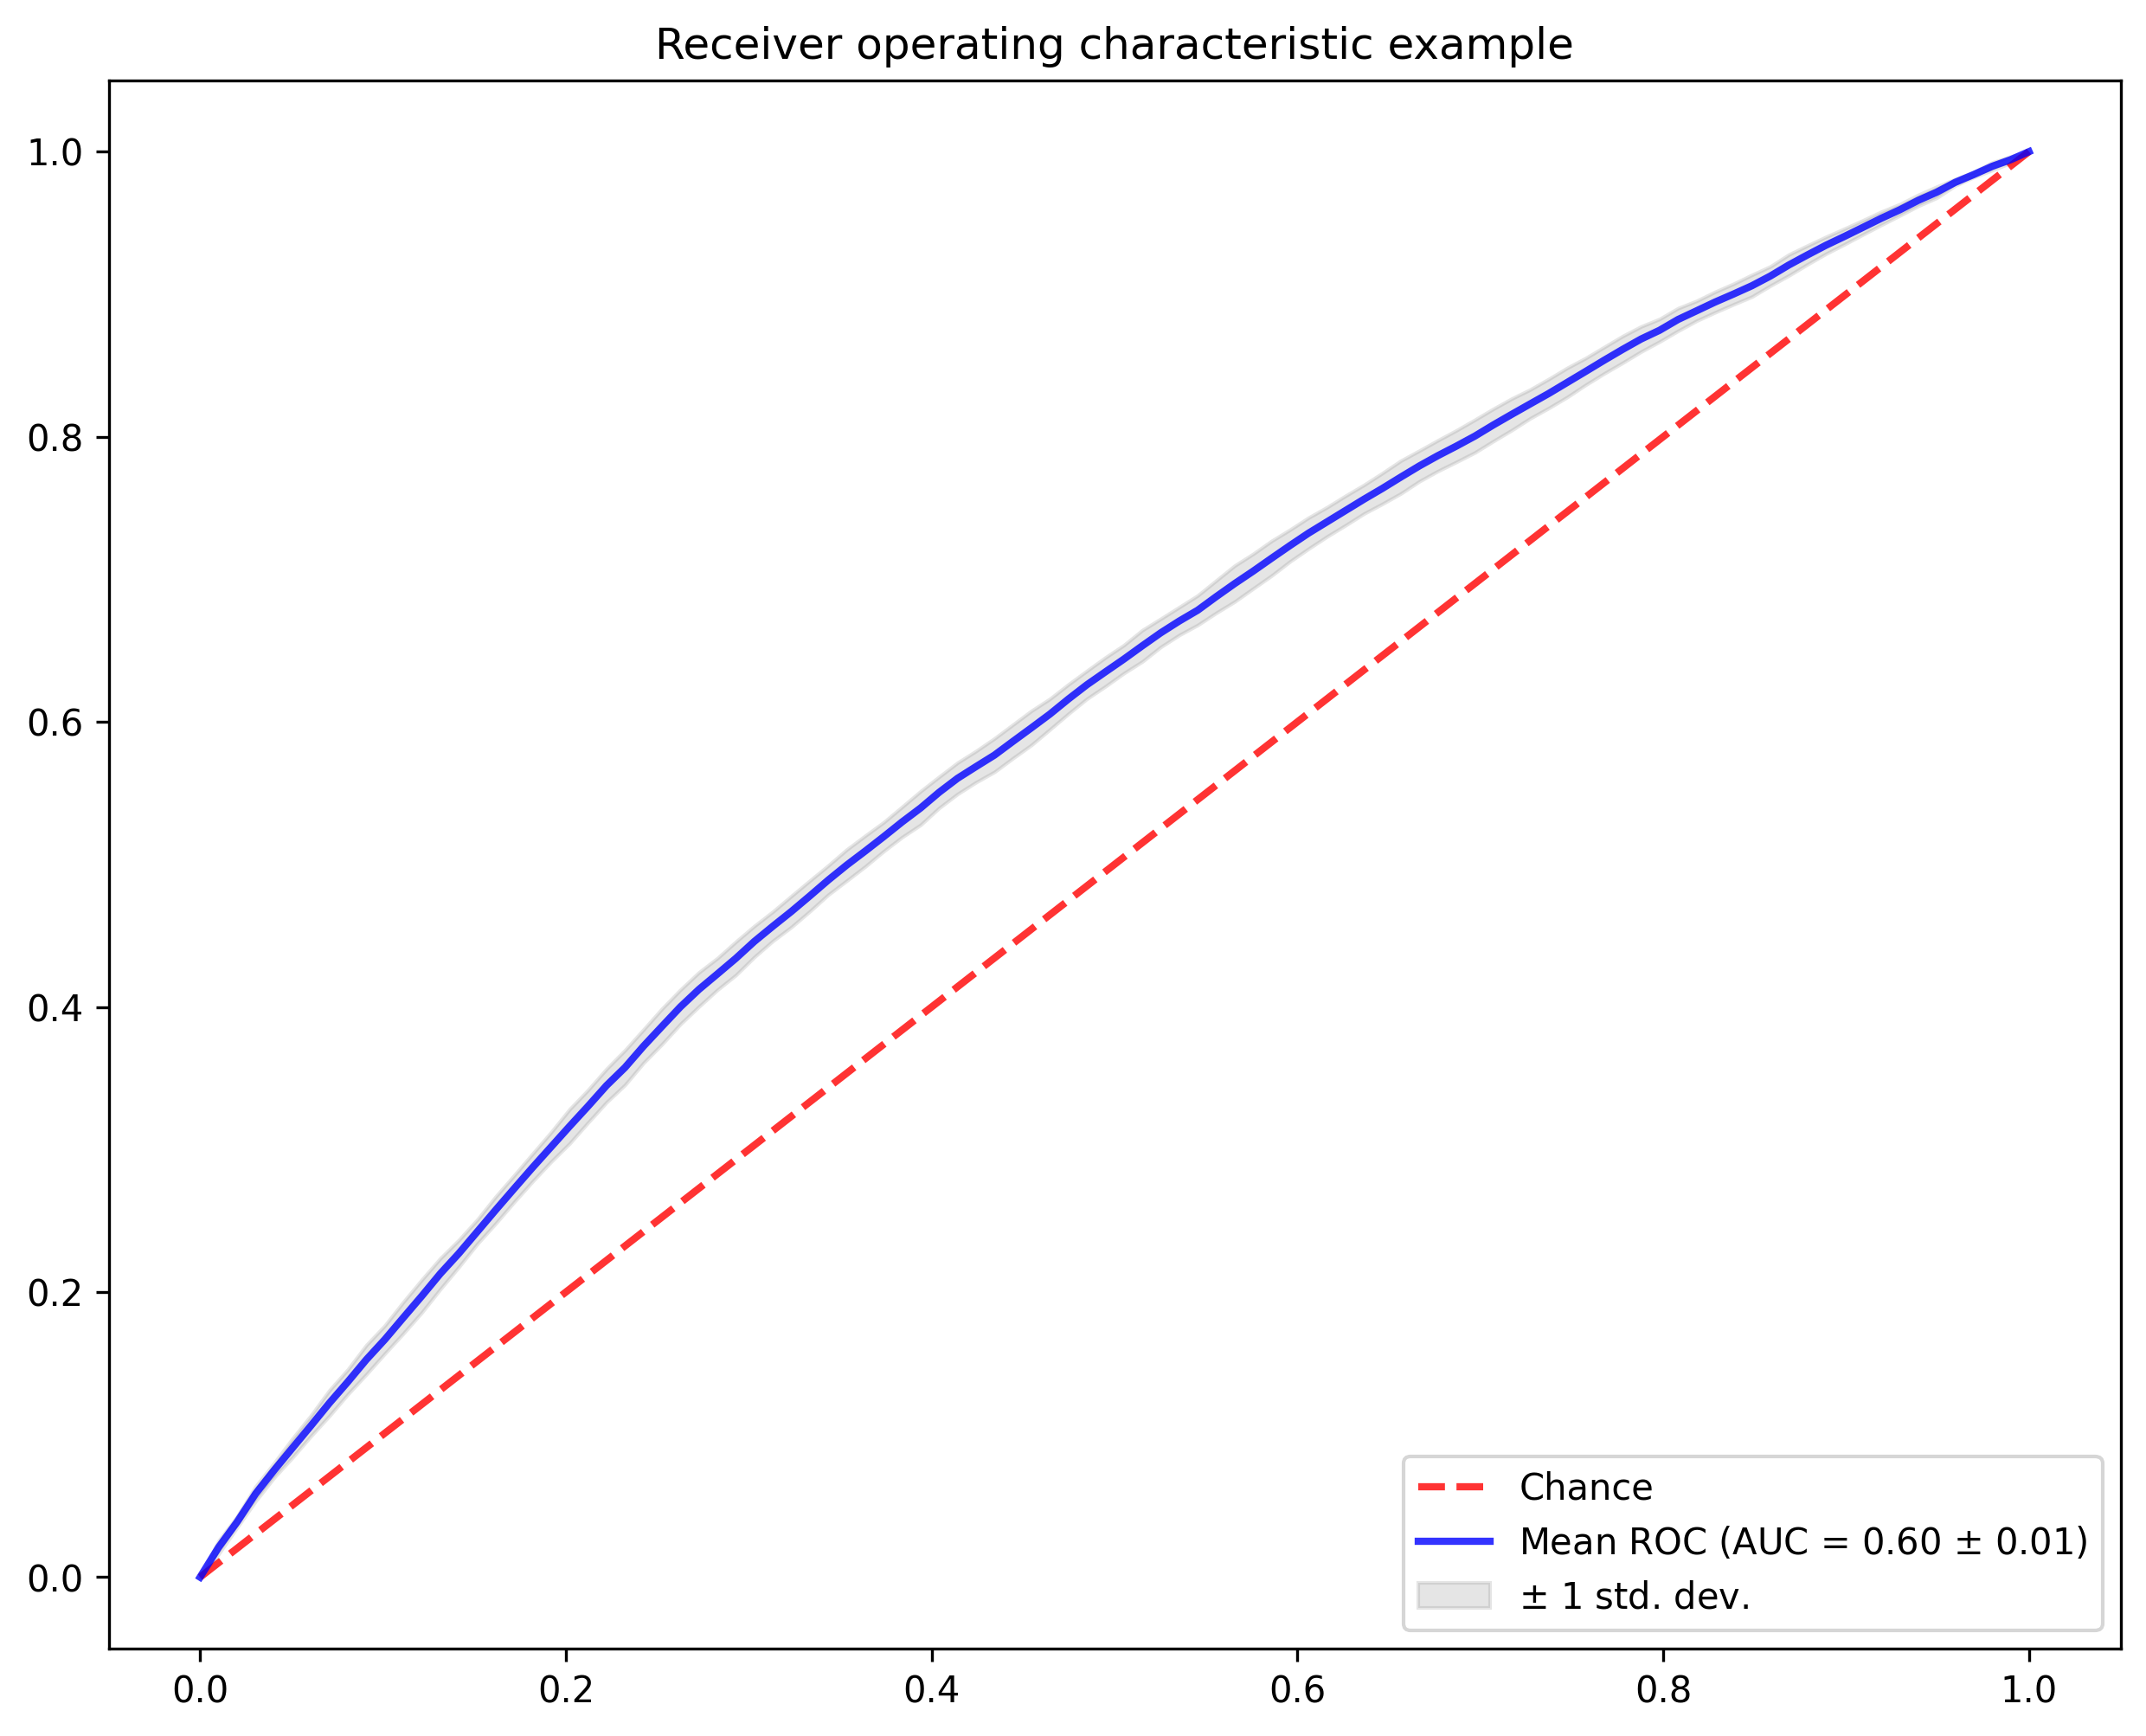

In [118]:
#generate ROC plot for SVM
ROC_SVC(classifier,xm,ym)

##K-NN

In [57]:
# find best value for n_neighbors
values = [1,2,3,4,5]
precision_values = []
recall_values = []
for i in values:
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(x_scaled, ym)
  report = classification_report(ym, classifier.predict(x_scaled), output_dict=True)
  precision_values.append(report['1']['recall'])
  recall_values.append(report['1']['precision'])

In [58]:
precision_values

[1.0,
 0.43426753941181895,
 0.6729049506776067,
 0.40057158661381026,
 0.569558403245137]

In [59]:
recall_values

[1.0, 1.0, 0.7539899798564124, 0.8075457671220146, 0.6935728318832445]

It seems as though n_neighbors = 1 is the best

In [17]:
classifier = KNeighborsClassifier(n_neighbors = 1)

In [111]:
#Generate classification report for K-NN
classifier.fit(x_scaled,ym)
report_knn = classification_report(ym, classifier.predict(x_scaled))

In [112]:
print(report_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       1.00      1.00      1.00     21694

    accuracy                           1.00    121694
   macro avg       1.00      1.00      1.00    121694
weighted avg       1.00      1.00      1.00    121694



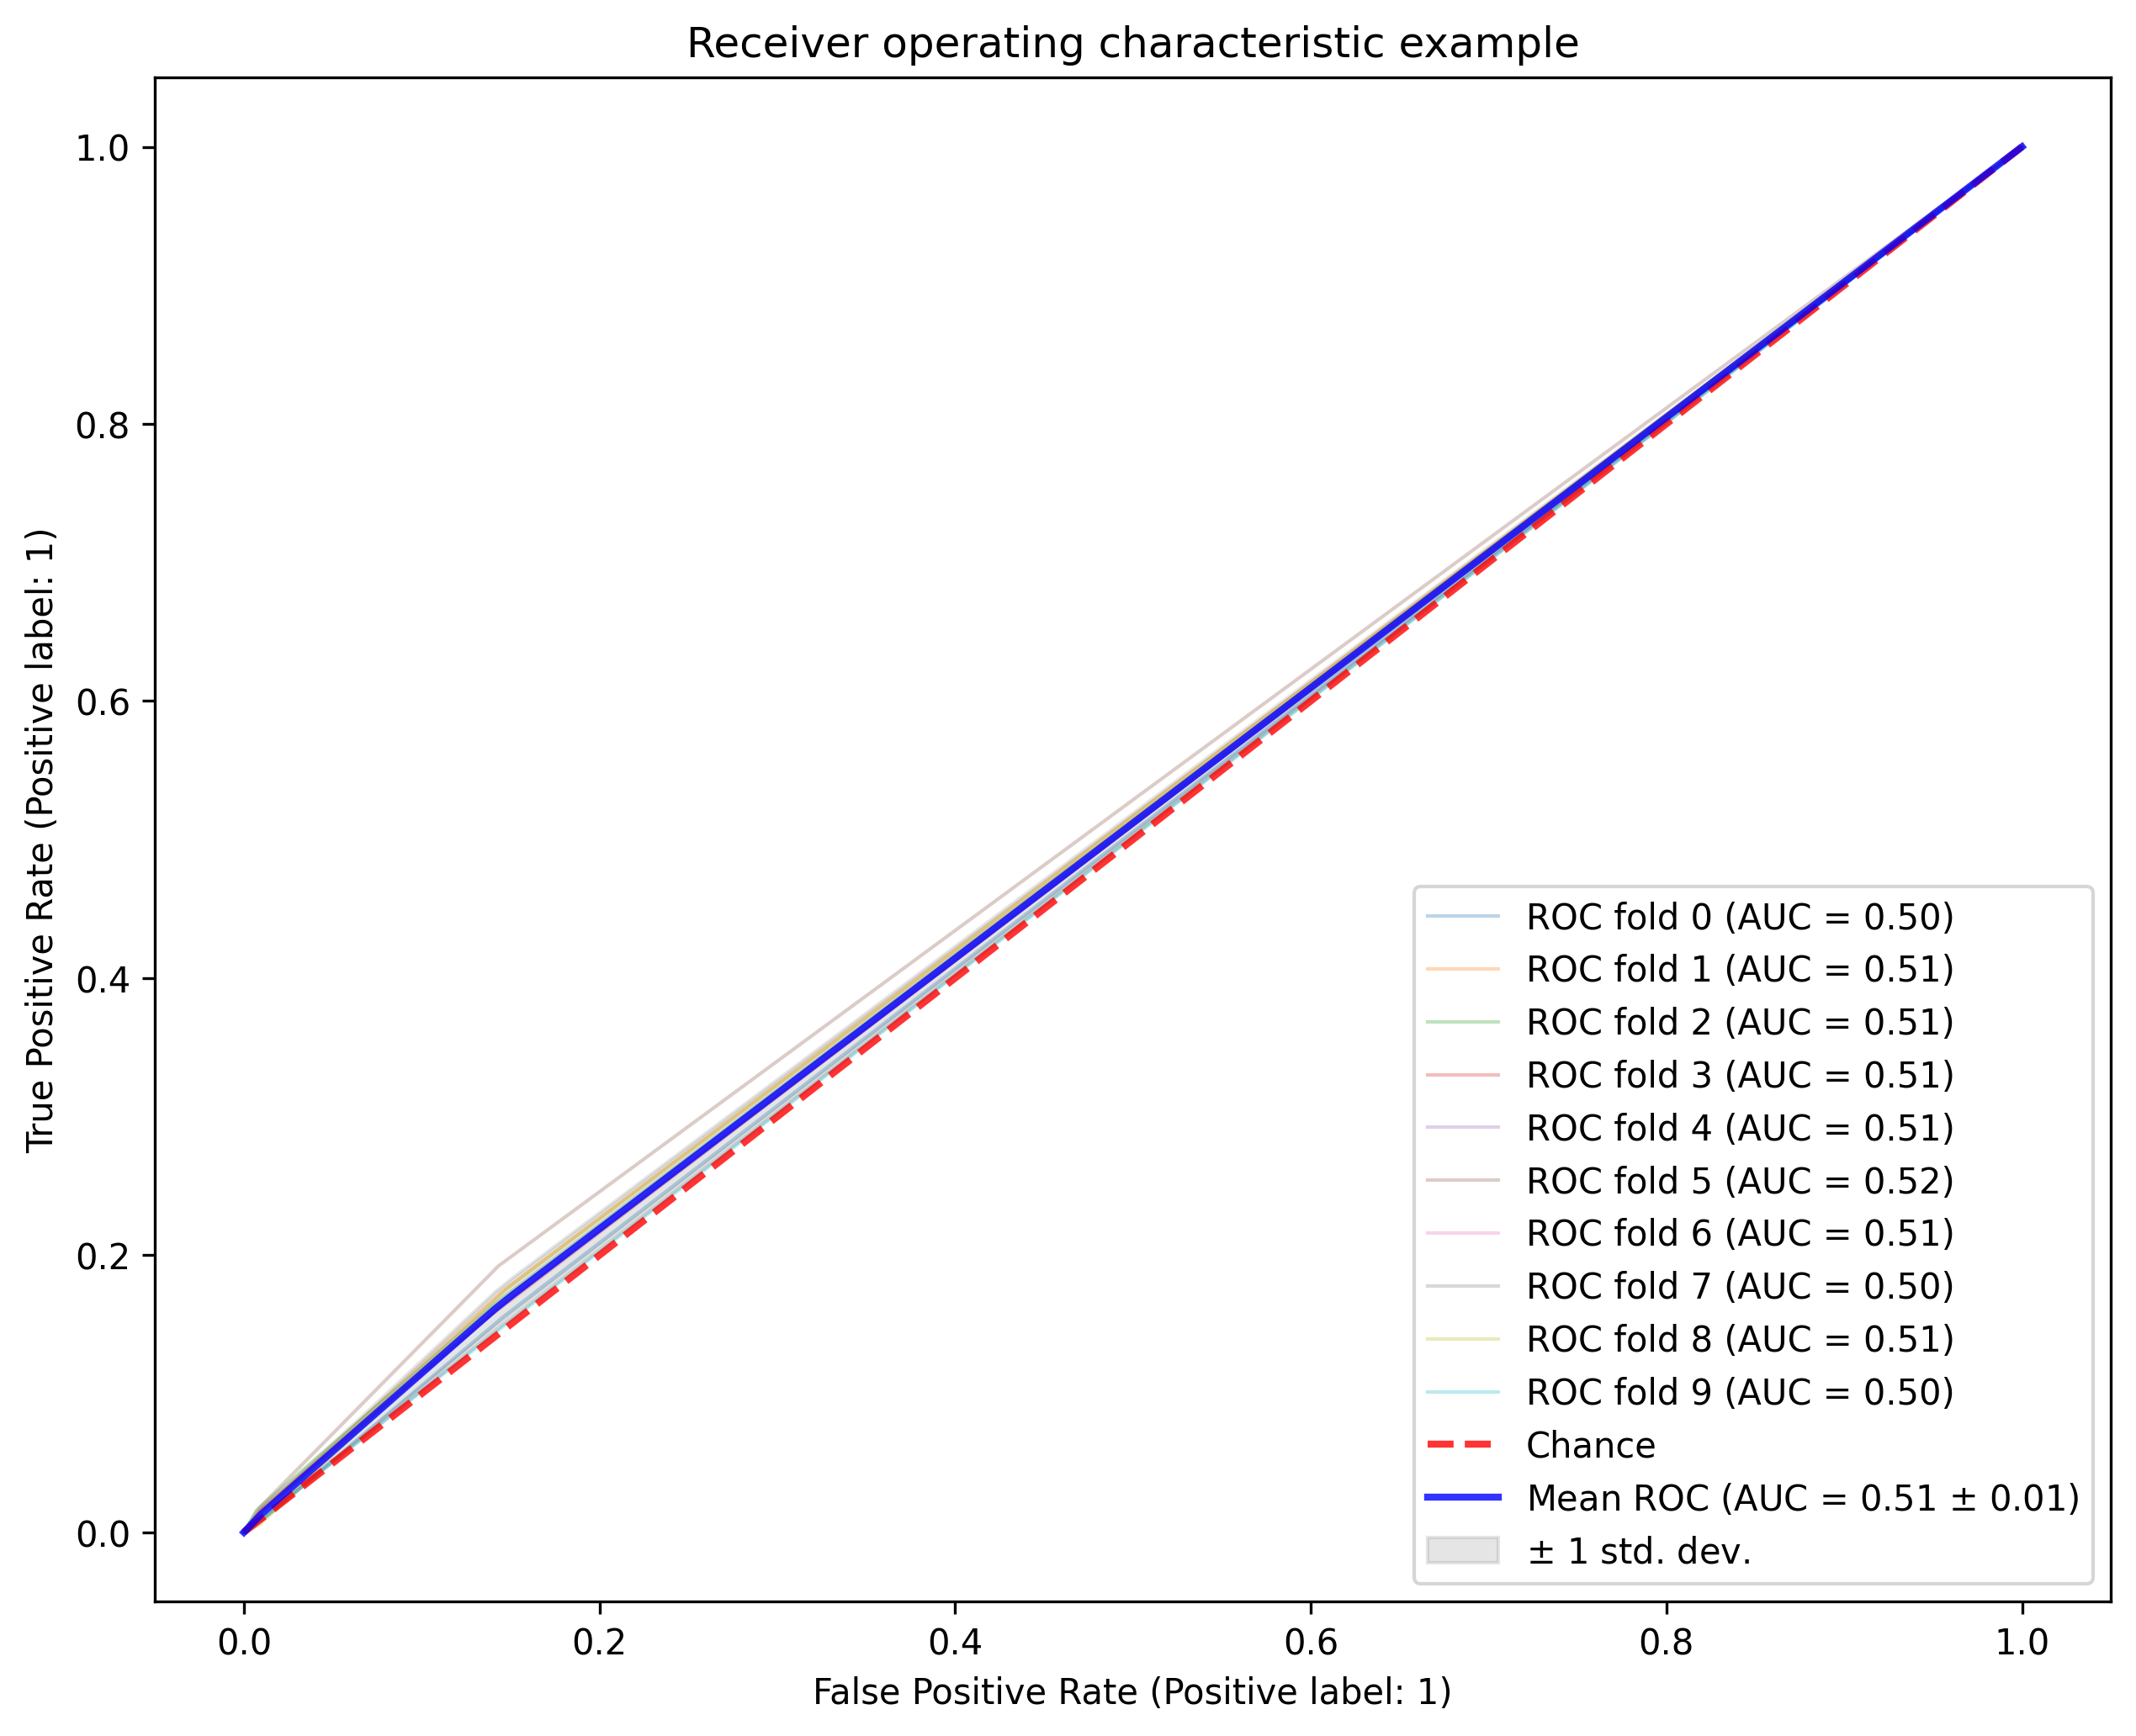

In [18]:
#Generate ROC plot for K-NN
ROC(classifier,xm,ym)

##Random Forest

In [120]:
# find best value for min_samples_leaf
values = [1,5,10,20]
precision_values_rf = []
recall_values_rf = []
for i in values:
  classifier = RandomForestClassifier(min_samples_leaf = i)
  classifier.fit(xm, ym)
  report = classification_report(ym, classifier.predict(xm), output_dict=True)
  precision_values_rf.append(report['1']['recall'])
  recall_values_rf.append(report['1']['precision'])

In [121]:
precision_values_rf

[0.9999539043053379,
 0.08873421222457822,
 0.009495713100396423,
 0.0012445837558772012]

In [122]:
recall_values_rf

[1.0, 0.9989621172807472, 0.9951690821256038, 1.0]

It seems as though 1 is the best value for min_samples_leaf

In [123]:
#Generate Classifcation report for Random Forest
classifier = classifier = RandomForestClassifier(min_samples_leaf=1)
classifier.fit(xm,ym)
report_rf = classification_report(ym, classifier.predict(xm))

In [124]:
print(report_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       1.00      1.00      1.00     21694

    accuracy                           1.00    121694
   macro avg       1.00      1.00      1.00    121694
weighted avg       1.00      1.00      1.00    121694



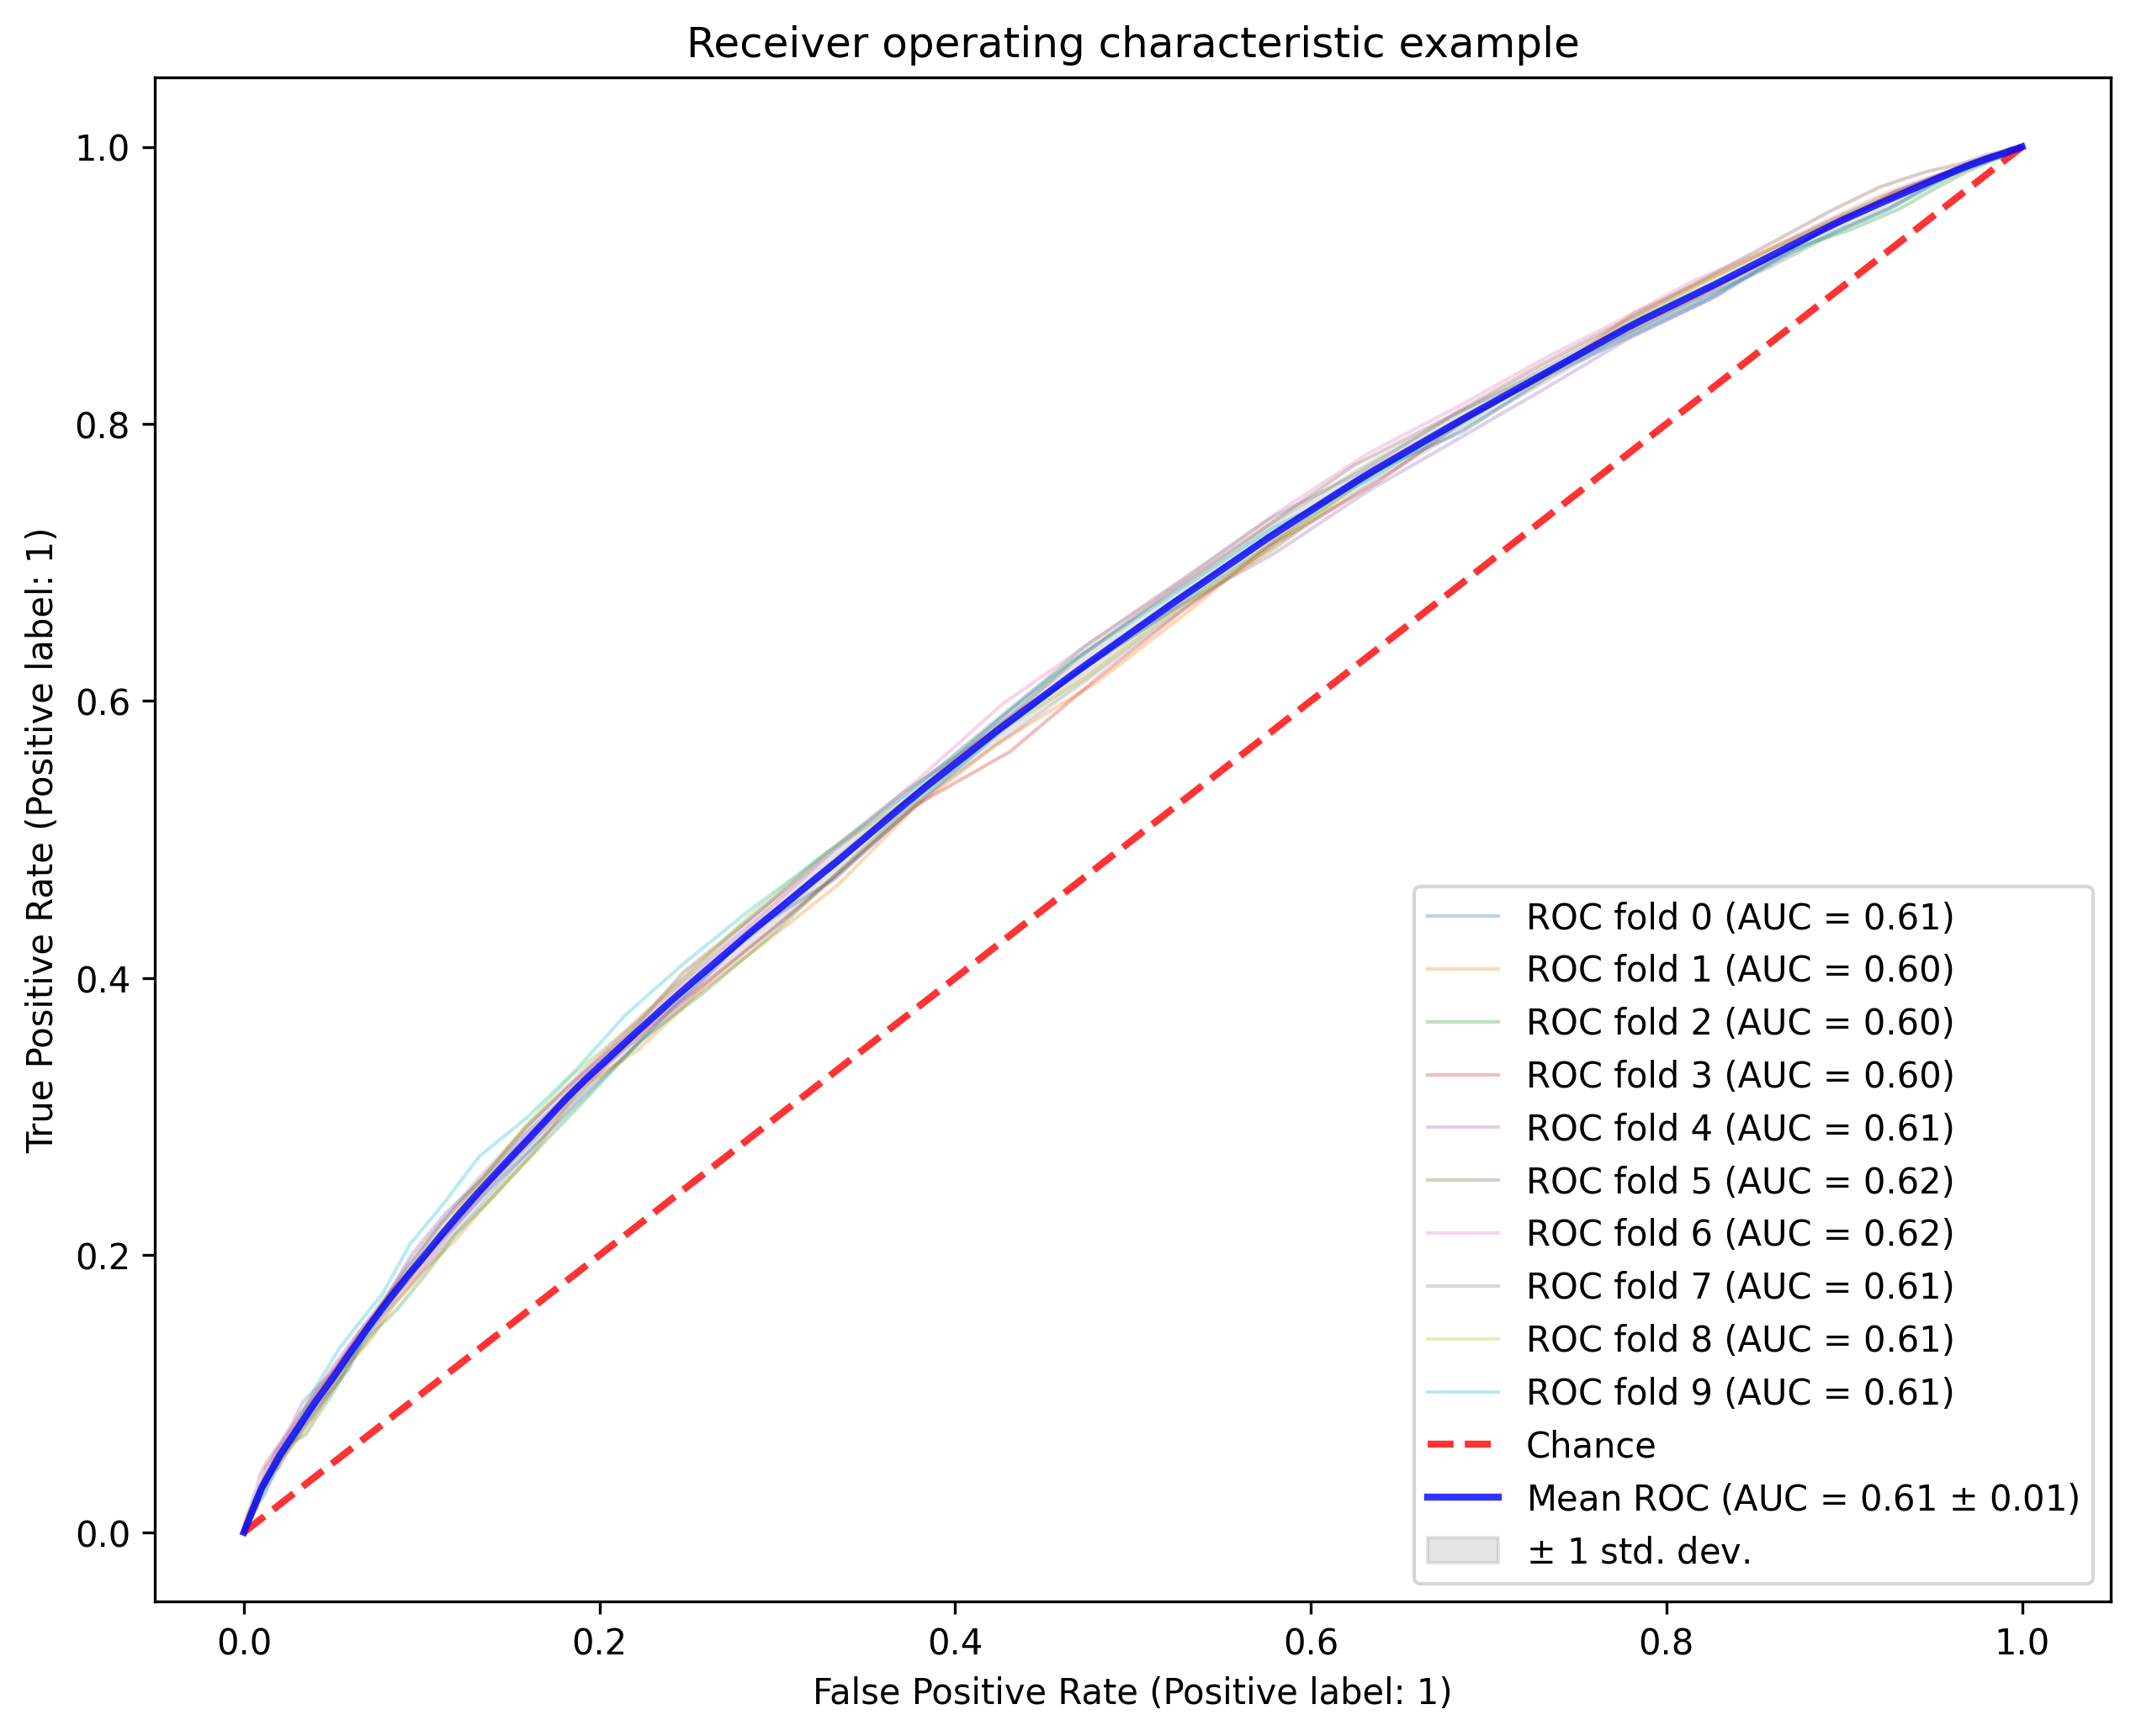

In [126]:
#Generate ROC plot for random forest
ROC(classifier,xm,ym)

## SVM and Random Forest performed better than K-NN and Logistic Regression based on recall/precision values and the ROC plots obtained after performing classifications with each method.